## EDA of bike sharing from kaggle - Multilinear Regression

Loading the data


In [331]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [332]:
df = pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [333]:
#checking for the null values on the dataset
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [334]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


# The data seems to have been correctly as there are no null values/no junk values

In [335]:
df.shape

(730, 16)

In [336]:
df.weathersit.unique()

array([2, 1, 3], dtype=int64)

# No values seems to be in columns as inconsistent data

## next we remove the columns which are not needed on the data

In [337]:
df.columns.values

array(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'], dtype=object)

we can remove instant as it seems an index dteday- this has been already seperated as we have yr months and season


In [338]:
df_new = df.drop(['instant','dteday','casual','registered'], axis = True)

In [339]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


## converting season, yr,mnth,holiday to category type in pandas for memory optimization

In [340]:
df_new['season']= df['season'].astype('category')
df_new['yr'] =df_new['yr'].astype('category')
df_new['mnth'] =df_new['mnth'].astype('category')
df_new['holiday'] =df_new['holiday'].astype('category')

In [341]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    category
 2   mnth        730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    int64   
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    int64   
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.4 KB


In [342]:
df_new = pd.get_dummies(df_new,dtype =int)

In [343]:
df_new.head()

,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_1,season_2,...,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,holiday_0,holiday_1
0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,0,0,1,0
2,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,0,1,0
3,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,1,0
4,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,1,0


In [344]:
df_new.shape

(730, 28)

In [345]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(df_new, train_size =0.70 , test_size=0.30, random_state=333)

Encountered an issue here that the "cnt" columns has issues due to was set to index so removed the index

In [346]:
X_train = X_train.reset_index()
X_test= X_test.reset_index()

Drop the index after resetting the index

In [347]:
X_train=X_train.drop("index",axis = True)
X_test= X_test.drop("index",axis=True)

# Creating the dataframe for the only the numerical variable

In [348]:
df_numerical_data = X_train[['temp','atemp','hum','windspeed','cnt']]

Creating a pair plot to get the relationship between the numerical data

C:\Users\91908\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


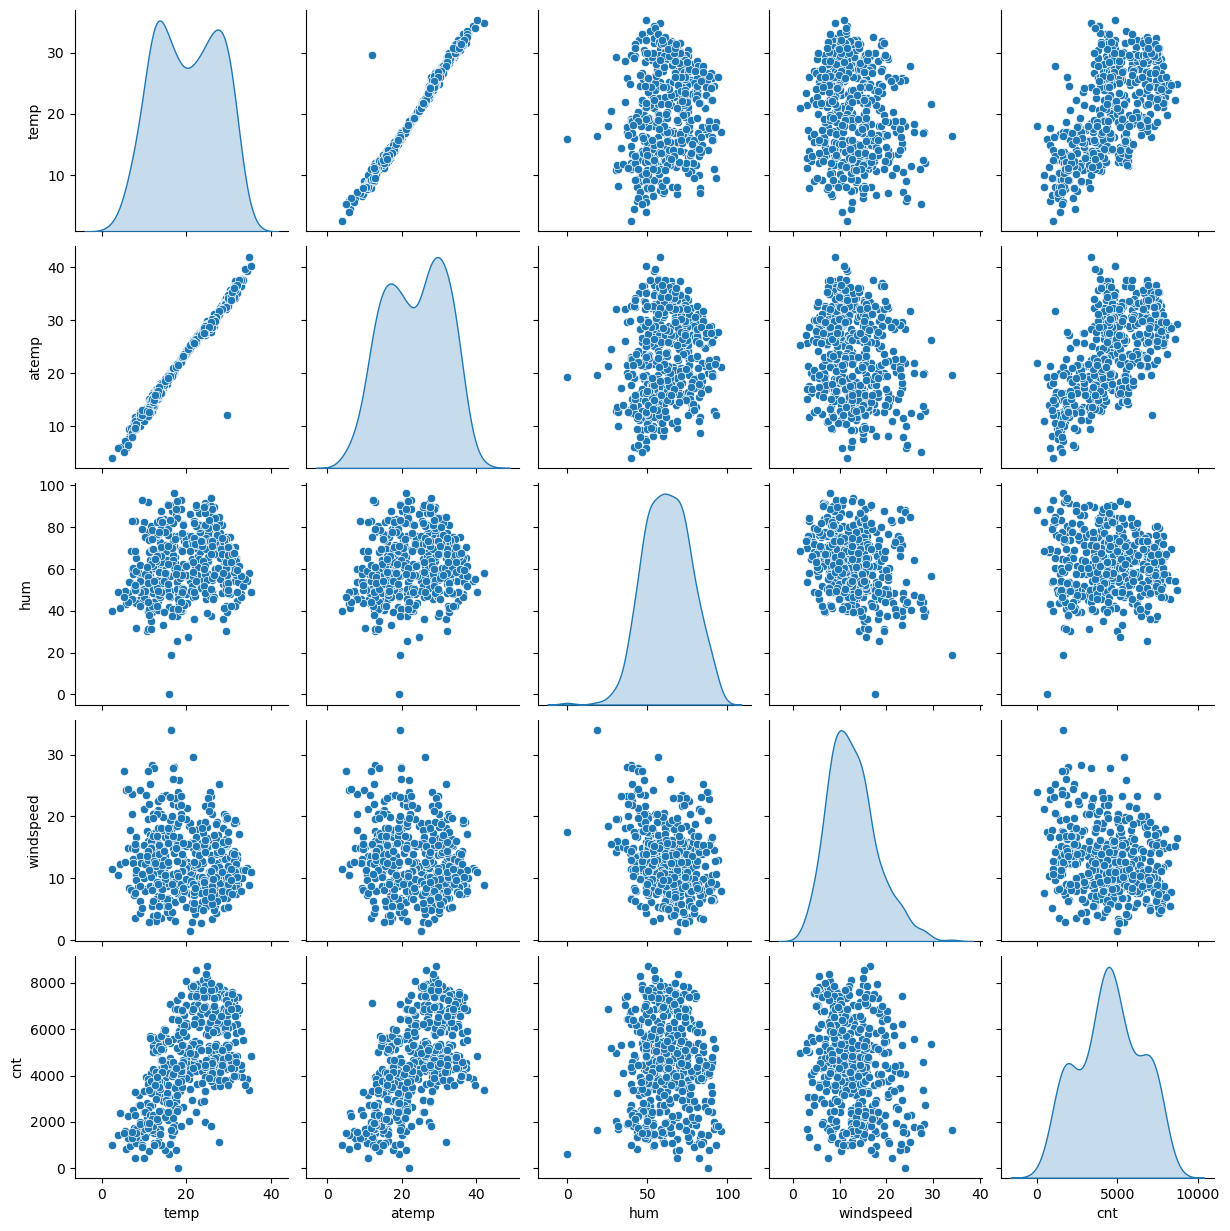

In [349]:
sns.pairplot(df_numerical_data,diag_kind='kde')

<Axes: >

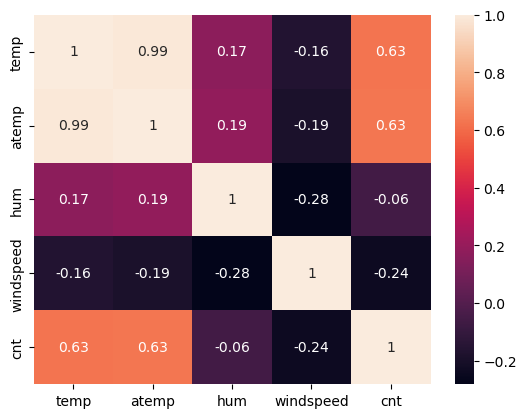

In [350]:
sns.heatmap(df_numerical_data.corr(),annot = True)

# this seems a clear linear relationship between the atemp,temp and cnt

Let explore the dataset with respect to categorical variables

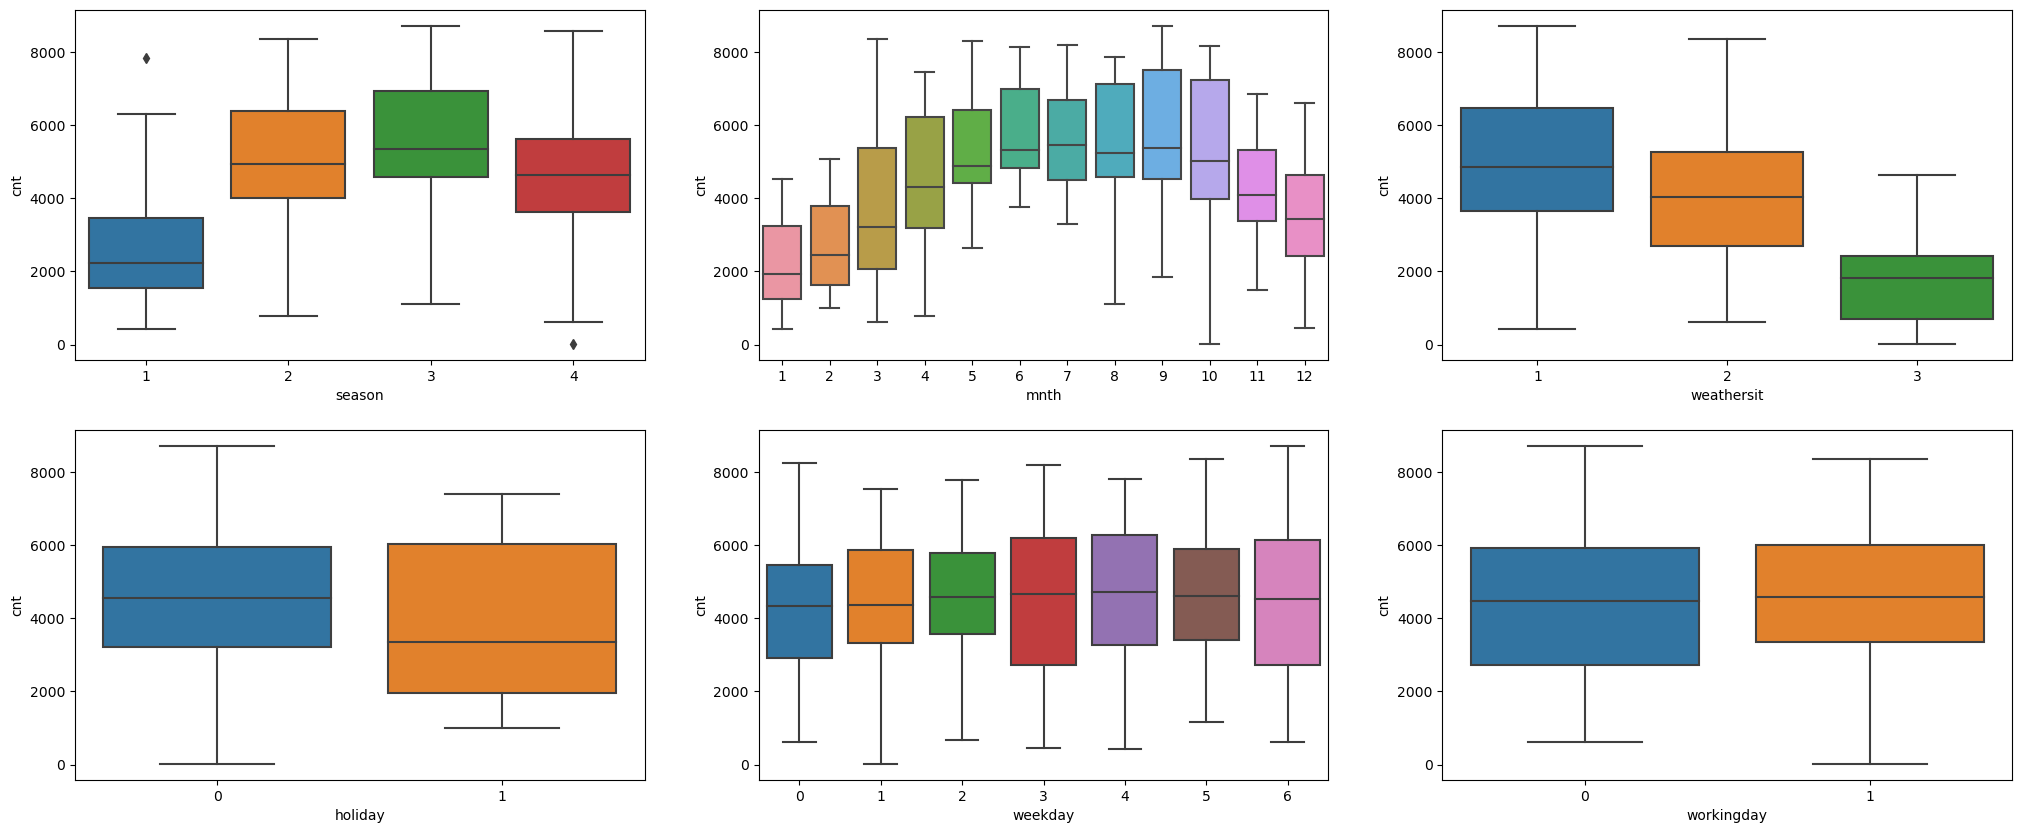

In [352]:
# Creating a box plot with the column cnt with all the variables

plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.show()





<Axes: >

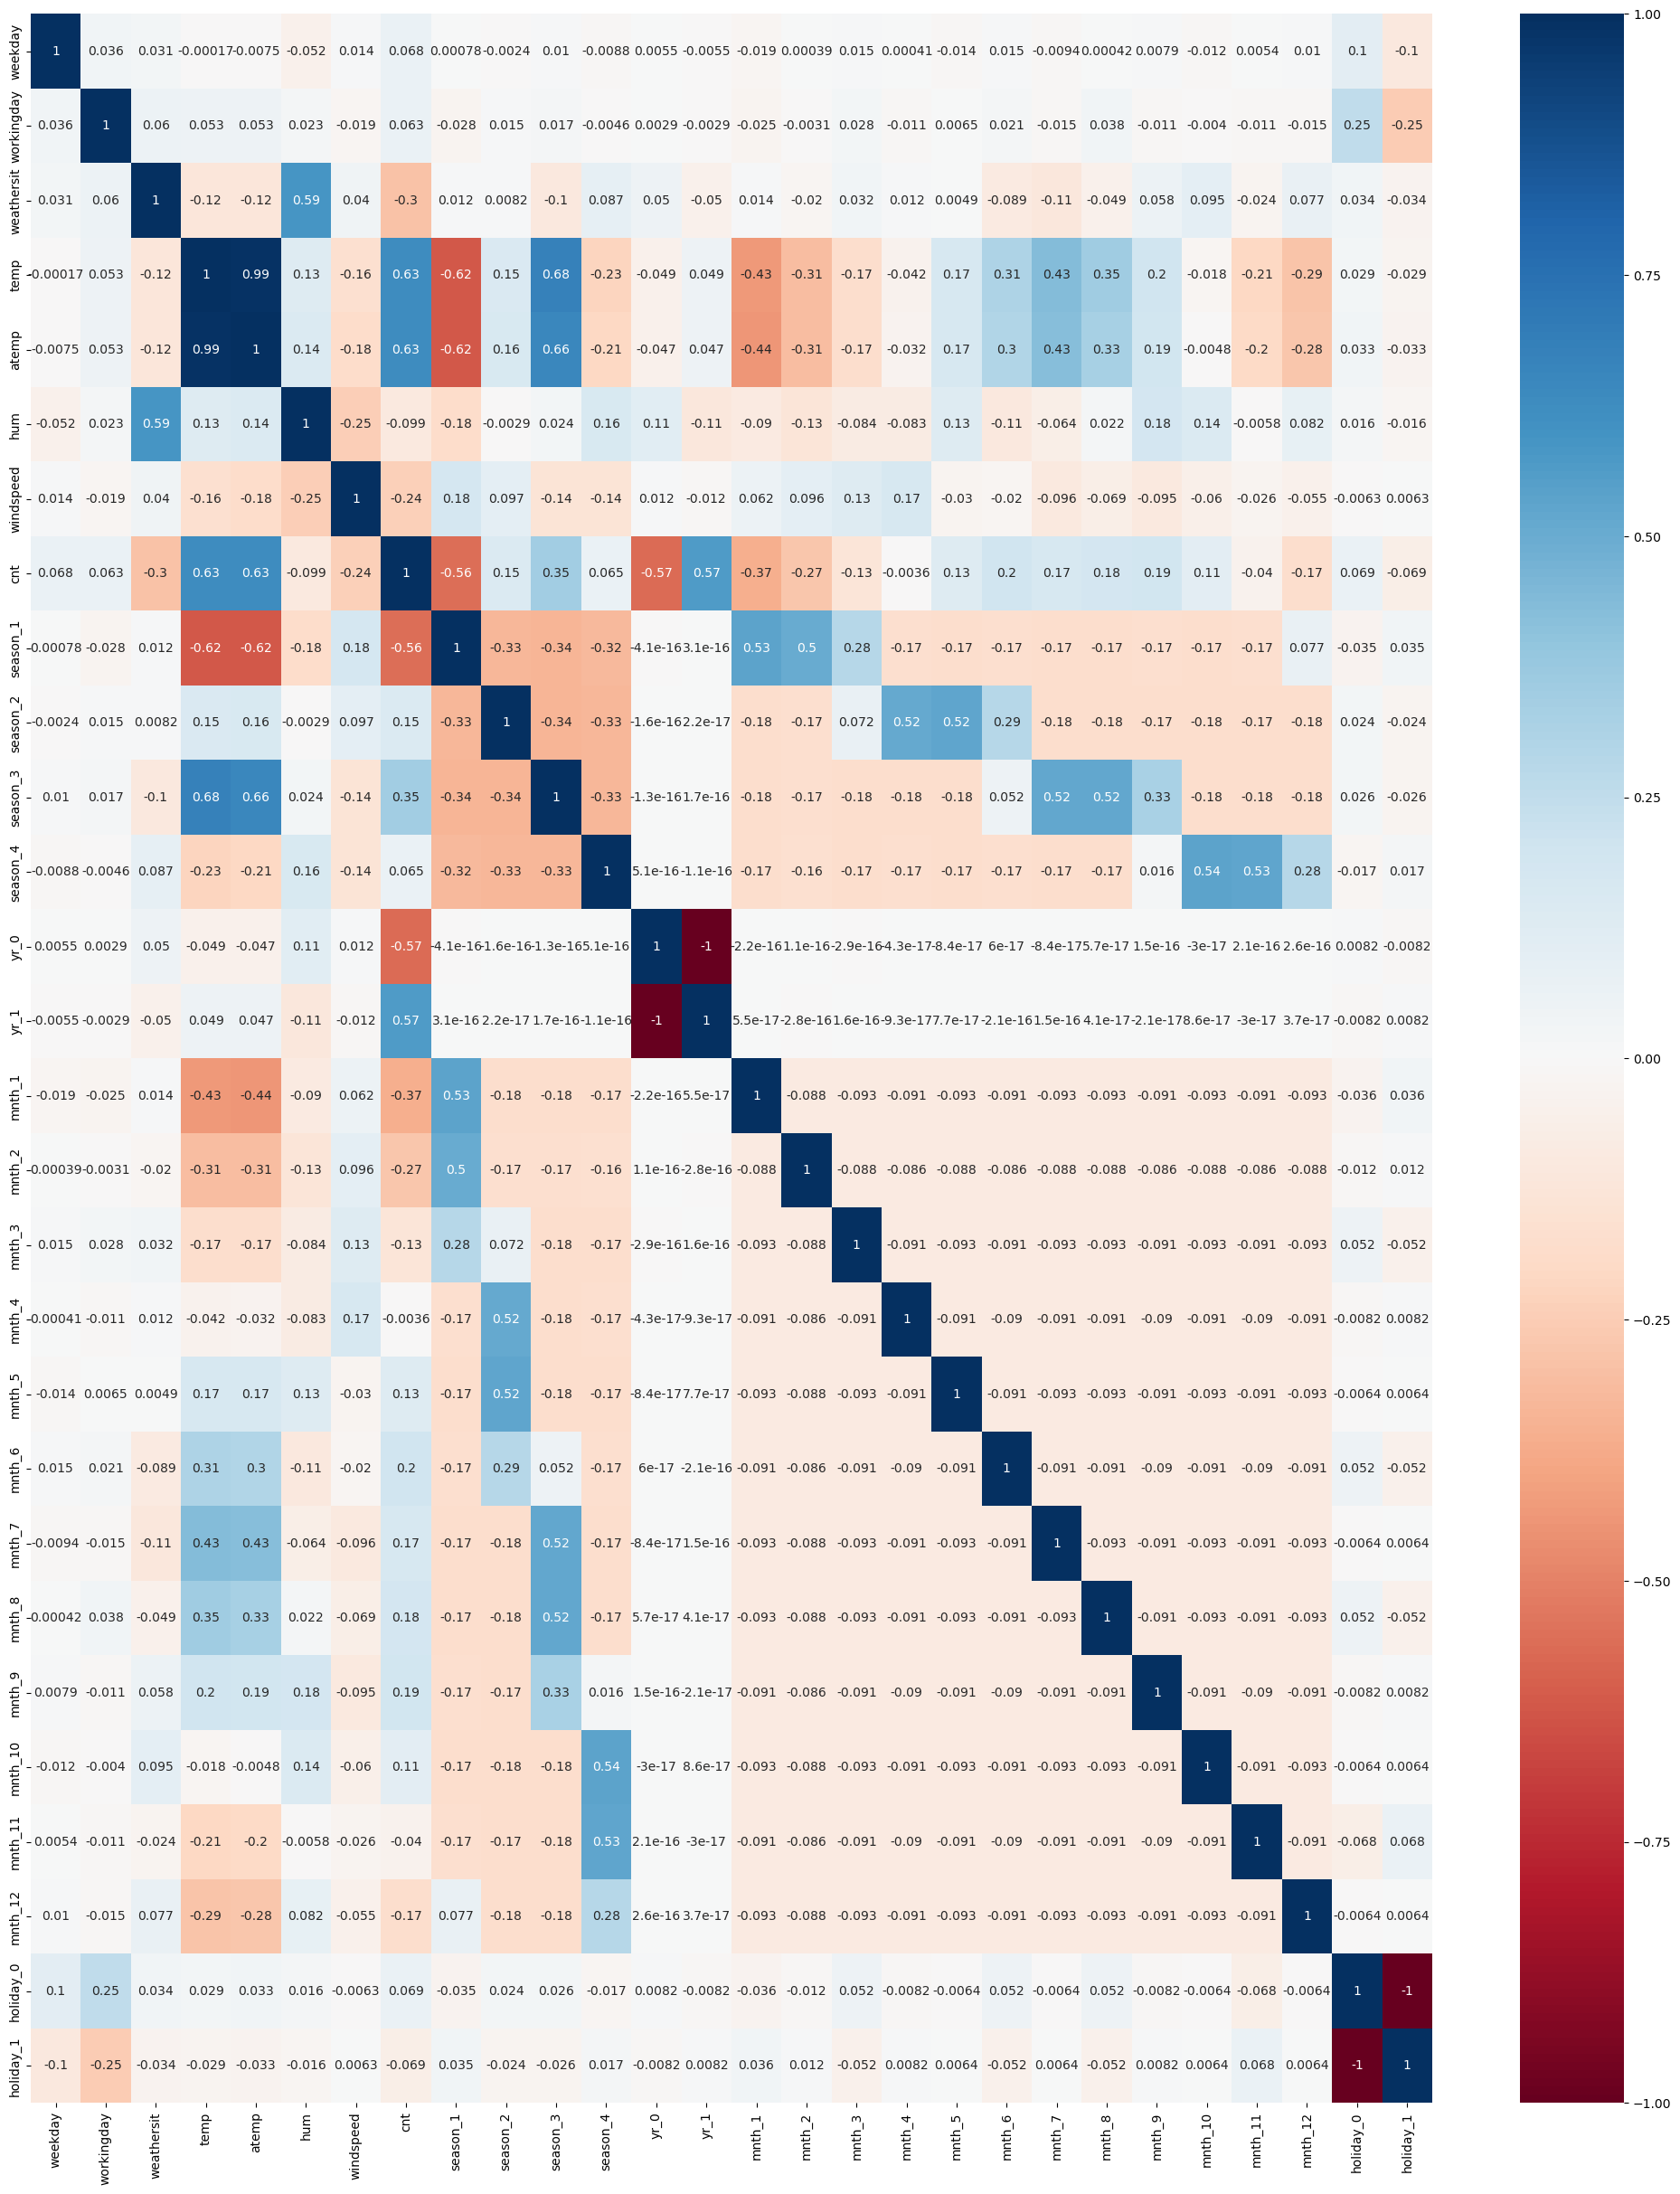

In [353]:
plt.figure(figsize=(25,30))
sns.heatmap(df_new.corr(),annot=True,cmap="RdBu")

## We can see the correlation between the variables 
## Also we need to be back at this heat map to check the VIF and p value on the map to check and eliminate the variables


In [354]:
# importing to scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [355]:
#applying the transform to the numerical data
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])


In [356]:
X_train.head()

,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_1,season_2,...,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,holiday_0,holiday_1
0,0,0,1,0.497426,0.487055,0.609956,0.194850,0.722734,0,1,...,0,0,0,0,0,0,0,0,1,0
1,6,0,1,0.416433,0.409971,0.513852,0.255118,0.815347,0,0,...,0,0,0,0,0,1,0,0,1,0
2,1,1,1,0.887856,0.819376,0.572294,0.276919,0.488265,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,2,0.378013,0.381804,0.871429,0.161523,0.433042,0,0,...,0,0,0,0,0,0,0,1,1,0
4,0,0,1,0.098690,0.048706,0.451083,0.700017,0.092039,1,0,...,0,0,0,0,0,0,0,0,1,0


In [357]:
X_train.columns.values

array(['weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum',
       'windspeed', 'cnt', 'season_1', 'season_2', 'season_3', 'season_4',
       'yr_0', 'yr_1', 'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5',
       'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'holiday_0', 'holiday_1'], dtype=object)

In [358]:
y_train = X_train.pop('cnt')

## Now we go ahead and select some features in the on the dataset to using RFE : Recursive feature elimination from Scikit learn

In [359]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [360]:
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [361]:
rfe = RFE(estimator=LR,n_features_to_select=15)
rfe = rfe.fit(X_train,y_train)

In [362]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('weekday', False, 8),
 ('workingday', False, 7),
 ('weathersit', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_1', True, 1),
 ('season_2', False, 3),
 ('season_3', False, 10),
 ('season_4', True, 1),
 ('yr_0', True, 1),
 ('yr_1', True, 1),
 ('mnth_1', False, 5),
 ('mnth_2', False, 6),
 ('mnth_3', True, 1),
 ('mnth_4', False, 11),
 ('mnth_5', False, 2),
 ('mnth_6', False, 9),
 ('mnth_7', True, 1),
 ('mnth_8', False, 12),
 ('mnth_9', True, 1),
 ('mnth_10', False, 13),
 ('mnth_11', True, 1),
 ('mnth_12', True, 1),
 ('holiday_0', False, 4),
 ('holiday_1', True, 1)]

As we can see here we have found the ranking of the every variable through the recursive feature selection now we know which variable is good for predicting the data 

In [363]:
col = X_train.columns[rfe.support_]
col

Index(['weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'season_1',
       'season_4', 'yr_0', 'yr_1', 'mnth_3', 'mnth_7', 'mnth_9', 'mnth_11',
       'mnth_12', 'holiday_1'],
      dtype='object')

In [364]:
Not_col = X_train.columns[~rfe.support_]
Not_col

Index(['weekday', 'workingday', 'season_2', 'season_3', 'mnth_1', 'mnth_2',
       'mnth_4', 'mnth_5', 'mnth_6', 'mnth_8', 'mnth_10', 'holiday_0'],
      dtype='object')

In [365]:
X_train_rfe = X_train[col]

## Creating Model 1 from the  Above observation

In [366]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])] 
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
1,temp,53.41
2,atemp,51.75
8,yr_1,30.57
7,yr_0,30.24
5,season_1,2.72
6,season_4,2.25
3,hum,1.96
12,mnth_11,1.70
0,weathersit,1.69
13,mnth_12,1.31


In [367]:
import statsmodels.api as sm

X_train_lm1 = sm.add_constant(X_train_rfe)

result = sm.OLS(y_train,X_train_lm1).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     168.3
Date:                Wed, 28 Feb 2024   Prob (F-statistic):          6.96e-178
Time:                        23:46:31   Log-Likelihood:                 485.71
No. Observations:                 510   AIC:                            -941.4
Df Residuals:                     495   BIC:                            -877.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3729      0.022     17.239      0.000       0.330       0.415
weathersit    -0.0727      0.010     -7.160      0.000      -0.093      -0.053
temp           0.3149      0.135      2.338      0.020       0.050       0.580
atemp          0.1478      0.141      1.045      0.297      -0.130       0.426
hum           -0.1602      0.039     -4.081      0.000      -0.237      -0.083
windspeed     -0.1970      0.029     -6.794      0.000      -0.254      -0.140
season_1      -0.1224      0.016     -7.652      0.000      -0.154      -0.091
season_4       0.0762      0.015      5.175      0.000       0.047       0.105
yr_0           0.0705      0.012      6.074      0.000       0.048       0.093
yr_1           0.3024      0.012     25.954      0.000       0.279       0.325
mnth_3         0.0435      0.017      2.612      0.009       0.011       0.076
mnth_7        -0.0585      0.018     -3.290      0.001      -0.093      -0.024
mnth_9         0.0576      0.016      3.564      0.000       0.026       0.089
mnth_11       -0.0616      0.020     -3.156      0.002      -0.100      -0.023
mnth_12       -0.0426      0.018     -2.358      0.019      -0.078      -0.007
holiday_1     -0.0386      0.028     -1.377      0.169      -0.094       0.016
==============================================================================
Omnibus:                       78.068   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              203.143
Skew:                          -0.766   Prob(JB):                     7.73e-45
Kurtosis:                       5.685   Cond. No.                     1.33e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.39e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Removing atemp due to high piv and p value

In [383]:
New_X_train_rfe =X_train_rfe.drop(['atemp'], axis=1)
New_X_train_rfe

,weathersit,temp,hum,windspeed,season_1,season_4,yr_0,yr_1,mnth_3,mnth_7,mnth_9,mnth_11,mnth_12,holiday_1
0,1,0.497426,0.609956,0.194850,0,0,0,1,0,0,0,0,0,0
1,1,0.416433,0.513852,0.255118,0,1,0,1,0,0,0,0,0,0
2,1,0.887856,0.572294,0.276919,0,0,1,0,0,0,0,0,0,0
3,2,0.378013,0.871429,0.161523,0,1,0,1,0,0,0,0,1,0
4,1,0.098690,0.451083,0.700017,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,1,0.477697,0.424242,0.274350,0,0,0,1,0,0,0,0,0,0
506,2,0.588804,0.853247,0.138467,0,0,0,1,1,0,0,0,0,0
507,1,0.322889,0.439977,0.472919,1,0,1,0,0,0,0,0,0,0
508,1,0.310971,0.671711,0.340487,1,0,0,1,0,0,0,0,0,0


## Creating the Model 2

In [384]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['features'] = New_X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(New_X_train_rfe.values, i) for i in range(New_X_train_rfe.shape[1])] 
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
7,yr_1,30.29
6,yr_0,29.96
1,temp,3.23
4,season_1,2.71
5,season_4,2.24
2,hum,1.95
11,mnth_11,1.70
0,weathersit,1.69
12,mnth_12,1.31
9,mnth_7,1.30


In [386]:
X_train_lm2 = sm.add_constant(New_X_train_rfe)

result = sm.OLS(y_train,X_train_lm2).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     181.1
Date:                Wed, 28 Feb 2024   Prob (F-statistic):          8.71e-179
Time:                        23:57:05   Log-Likelihood:                 485.14
No. Observations:                 510   AIC:                            -942.3
Df Residuals:                     496   BIC:                            -883.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3750      0.022     17.421      0.000       0.333       0.417
weathersit    -0.0732      0.010     -7.213      0.000      -0.093      -0.053
temp           0.4513      0.033     13.630      0.000       0.386       0.516
hum           -0.1579      0.039     -4.028      0.000      -0.235      -0.081
windspeed     -0.2022      0.029     -7.079      0.000      -0.258      -0.146
season_1      -0.1227      0.016     -7.676      0.000      -0.154      -0.091
season_4       0.0774      0.015      5.272      0.000       0.049       0.106
yr_0           0.0716      0.012      6.192      0.000       0.049       0.094
yr_1           0.3035      0.012     26.155      0.000       0.281       0.326
mnth_3         0.0442      0.017      2.656      0.008       0.012       0.077
mnth_7        -0.0586      0.018     -3.292      0.001      -0.094      -0.024
mnth_9         0.0567      0.016      3.511      0.000       0.025       0.088
mnth_11       -0.0622      0.020     -3.187      0.002      -0.100      -0.024
mnth_12       -0.0427      0.018     -2.365      0.018      -0.078      -0.007
holiday_1     -0.0394      0.028     -1.406      0.160      -0.094       0.016
==============================================================================
Omnibus:                       75.797   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              195.479
Skew:                          -0.748   Prob(JB):                     3.57e-43
Kurtosis:                       5.639   Cond. No.                     1.20e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.62e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Observation:

1. The PIV value of yr_0 and yr_1 is too high as due to biasing of the dataset in the might be the popularity could have decresed in the following year due any consequences
2. These might be dropped as a consequense as to it does affect the model statistics

In [389]:
# Removing the yr_0 and yr_1 from the dataset
Next_New_X_train_rfe =New_X_train_rfe.drop(['yr_0','yr_1'], axis=1)
Next_New_X_train_rfe

,weathersit,temp,hum,windspeed,season_1,season_4,mnth_3,mnth_7,mnth_9,mnth_11,mnth_12,holiday_1
0,1,0.497426,0.609956,0.194850,0,0,0,0,0,0,0,0
1,1,0.416433,0.513852,0.255118,0,1,0,0,0,0,0,0
2,1,0.887856,0.572294,0.276919,0,0,0,0,0,0,0,0
3,2,0.378013,0.871429,0.161523,0,1,0,0,0,0,1,0
4,1,0.098690,0.451083,0.700017,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
505,1,0.477697,0.424242,0.274350,0,0,0,0,0,0,0,0
506,2,0.588804,0.853247,0.138467,0,0,1,0,0,0,0,0
507,1,0.322889,0.439977,0.472919,1,0,0,0,0,0,0,0
508,1,0.310971,0.671711,0.340487,1,0,0,0,0,0,0,0


## Let's create a Third Model

In [391]:
# Calculating VIF once more to go ahead with the model creation to improve the model accuracy
next_vif = pd.DataFrame()
next_vif['features']=  Next_New_X_train_rfe.columns
next_vif['VIF'] = [variance_inflation_factor(Next_New_X_train_rfe.values,i) for i in range(Next_New_X_train_rfe.shape[1])]
next_vif['VIF'] = round(next_vif['VIF'],2)
next_vif

,features,VIF
0,weathersit,13.00
1,temp,13.07
2,hum,29.25
3,windspeed,5.16
4,season_1,2.44
5,season_4,2.67
6,mnth_3,1.22
7,mnth_7,1.40
8,mnth_9,1.22
9,mnth_11,1.80


In [392]:
X_train_lm3 = sm.add_constant(Next_New_X_train_rfe)

result = sm.OLS(y_train,X_train_lm3).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     54.25
Date:                Thu, 29 Feb 2024   Prob (F-statistic):           2.23e-82
Time:                        00:27:33   Log-Likelihood:                 252.70
No. Observations:                 510   AIC:                            -479.4
Df Residuals:                     497   BIC:                            -424.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5573      0.051     10.951      0.000       0.457       0.657
weathersit    -0.0652      0.016     -4.081      0.000      -0.097      -0.034
temp           0.5547      0.052     10.703      0.000       0.453       0.657
hum           -0.2813      0.061     -4.585      0.000      -0.402      -0.161
windspeed     -0.1963      0.045     -4.362      0.000      -0.285      -0.108
season_1      -0.1007      0.025     -4.001      0.000      -0.150      -0.051
season_4       0.1032      0.023      4.469      0.000       0.058       0.149
mnth_3         0.0522      0.026      1.992      0.047       0.001       0.104
mnth_7        -0.0724      0.028     -2.583      0.010      -0.127      -0.017
mnth_9         0.0655      0.025      2.573      0.010       0.015       0.115
mnth_11       -0.0432      0.031     -1.406      0.160      -0.104       0.017
mnth_12       -0.0145      0.028     -0.512      0.609      -0.070       0.041
holiday_1     -0.0042      0.044     -0.095      0.924      -0.091       0.082
==============================================================================
Omnibus:                       30.343   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.747
Skew:                           0.021   Prob(JB):                      0.00281
Kurtosis:                       2.258   Cond. No.                         22.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""